In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

**LOADING THE DATASET**

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

**INSPECTING THE DATA**

In [3]:
print(movies.head())
print(ratings.head())
print(tags.head())

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


**HANDLING THE MISSING VALUES**

In [4]:
print("Missing values in movies:\n", movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())
print("Missing values in tags:\n", tags.isnull().sum())

Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


**HANDLING DUPLICATE RECORDS**

In [5]:
print("Duplicates in ratings: ", ratings.duplicated().sum())
print("Duplicates in tags: ", tags.duplicated().sum())

Duplicates in ratings:  0
Duplicates in tags:  0


**DETECTING AND TREATING OUTLIERS**

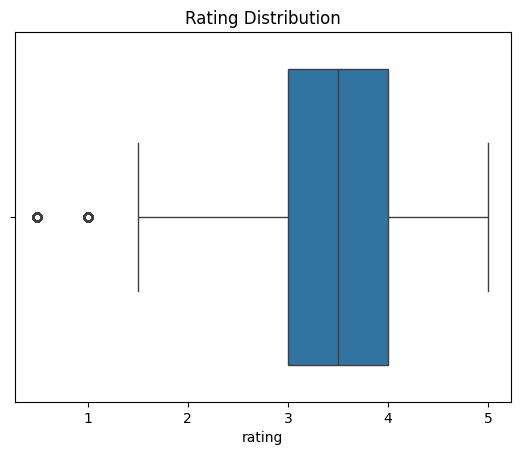

In [7]:
sns.boxplot(x = ratings['rating'])
plt.title('Rating Distribution')
plt.show()

**CONVERTING DATA TYPES AND ENSURING CONSISTENCY**

In [8]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit = 's')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit = 's')

**ENCODING CATEGORICAL VARIABLES**

In [10]:
# Split genres into lists
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Create one-hot encoding for genres
all_genres = sorted(list({genre for sublist in movies['genres'] for genre in sublist}))
for genre in all_genres:
    movies[genre] = movies['genres'].apply(lambda x: int(genre in x))

**NORMALIZING AND STANDARDIZING FEATURES**

In [11]:
#count ratings per movie
movie_rating_counts = ratings.groupby('movieId').size().reset_index(name = 'rating_count')

#Normalizing rating counts
scaler = MinMaxScaler()
movie_rating_counts['rating_count_normalized'] = scaler.fit_transform(movie_rating_counts[['rating_count']])

**MERGING DATASETS**

In [12]:
movies = movies.merge(movie_rating_counts, on='movieId', how='left')
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId', how='left')
